In [0]:
#!pip install patool

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

import os
import patoolib

In [0]:
#I upload the data on colab as a rar file
#This is necessary because when your data is in your local drive the training process can be slow
#That's why at each time I prefer to archive the data and upload it into colab
#next line allow me to unrar my datasets
patoolib.extract_archive("cat_dog_small.rar", outdir=".")

patool: Extracting cat_dog_small.rar ...
patool: running /usr/bin/unrar x -- /content/cat_dog_small.rar
patool:     with cwd='.'
patool: ... cat_dog_small.rar extracted to `.'.


'.'

In [0]:
base_dir = "cat_dog_small"
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),class_mode="binary")
test_generator = test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 146, 146, 32)      9248      
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 144, 144, 32)      9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 70, 70, 64)        18496     
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 68, 68, 64)        36928     
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 66, 66, 64)        36928     
__________

In [0]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=1e-4),metrics=["acc"])

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=test_generator,validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting t

100/100 [==============================] - 20s 201ms/step - loss: 0.6957 - acc: 0.5070 - val_loss: 0.6913 - val_acc: 0.5160
Epoch 2/30
 30/100 [========>.....................] - ETA: 9s - loss: 0.6944 - acc: 0.4933 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

100/100 [==============================] - 17s 173ms/step - loss: 0.6935 - acc: 0.5195 - val_loss: 0.6822 - val_acc: 0.5210
Epoch 3/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6759 - acc: 0.5680 - val_loss: 0.6611 - val_acc: 0.6100
Epoch 4/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6481 - acc: 0.6350 - val_loss: 0.6396 - val_acc: 0.6470
Epoch 5/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6500 - acc: 0.6340 - val_loss: 0.6413 - val_acc: 0.6420
Epoch 6/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6337 - acc: 0.6650 - val_loss: 0.6643 - val_acc: 0.6130
Epoch 7/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6315 - acc: 0.6445 - val_loss: 0.6364 - val_acc: 0.6370
Epoch 8/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6144 - acc: 0.6735 - val_loss: 0.6554 - val_acc: 0.6190
Epoch 9/30
100/100 [==============================] - 17s 172ms/st

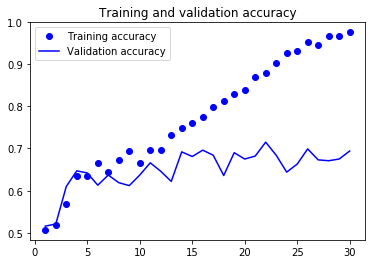

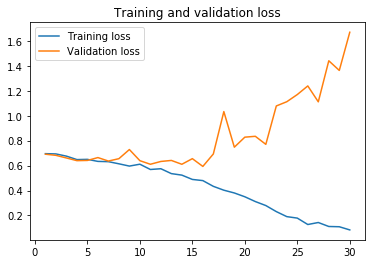

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accuracy')
plt.legend()
plt.title("Training and validation accuracy")
plt.figure()
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.legend()
plt.title("Training and validation loss")

plt.show()

In [0]:
model.save("cat_dog_small_1.h5")

In [0]:
ls

cat_dog_small/  cat_dog_small_1.h5  cat_dog_small.rar  sample_data/
